In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from matplotlib import dates as mdates
from collections import Counter, OrderedDict
import datetime
import seaborn as sns
import math  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

# Funções de Apoio

In [7]:
import sys
sys.path.append('../../TCC/evolutionary-computation/instances/weka/')

In [4]:
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [271]:
def pieChart(values, labels, legendTitle, title, colors=None):
    fig0, ax0 = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        absolute = int(round_up(pct/100.*np.sum(allvals), 1))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax0.pie(values, 
                                      autopct=lambda pct: func(pct, values),
                                      textprops=dict(color="w"), colors=colors)

    # Decoration
    ax0.legend(wedges, labels, title=legendTitle, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10, weight="bold")
    ax0.set_title(title)
    plt.show()

# Base Real de Materiais

In [8]:
from enums import InteractivityType
from enums import LearningResourceType
from enums import InteractivityLevel
from enums import Difficulty
from enums import Format

In [9]:
real_data = "LOM_to_csv.csv"

lom_df = pd.read_csv(real_data)

lom_df.head()

,identifier,title,keyword0,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,keyword7,...,learningResourceType1,learningResourceType2,learningResourceType3,learningResourceType4,learningResourceType5,learningResourceType6,learningResourceType7,interactivityLevel,difficulty,typicalLearningTime
0,255,Noções de Sistema Operacional,sistema operacional,sistema operacionais,so,funções do sistema operacional,característica do so,definição,tipos de so,classificação,...,LearningResourceType.TABLE,LearningResourceType.QUESTIONNAIRE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:15:17
1,269,O Sistema Operacional,sistema operacional,so,os,funções do so,funções,característica do so,definição,gerenciador,...,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:06:00
2,279,Componentes e Arquitetura,sistema operacional,so,os,memória,entrada e saída,sistema,hardware,cpu,...,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,LearningResourceType.TABLE,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:19:06
3,262,Tipos de Sistemas operacionais,sistema operacional,so,os,tipos de so,classificação,monoprogramado,monotarefa,monousuário,...,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.MEDIUM,00:44:17
4,278,Partes que compõem o computador,sistema operacional,so,os,memória,entrada e saída,sistema,hardware,cpu,...,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,LearningResourceType.TABLE,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.MEDIUM,00:17:48


Algumas características não são tão importantes no momento e além disso possuem muitos dados faltantes(NaN). Portanto iremos descartá-las: <b>title</b>, <b>keywords</b>[0..38].

In [563]:

lom_df2 = lom_df.drop(columns=['title'] + ['keyword'+str(i) for i in range(39)])
lom_df2.head()

,identifier,format,size,interactivityType,learningResourceType0,learningResourceType1,learningResourceType2,learningResourceType3,learningResourceType4,learningResourceType5,learningResourceType6,learningResourceType7,interactivityLevel,difficulty,typicalLearningTime
0,255,Format.APPLICATION_PDF,3.116660e+05,InteractivityType.MIXED,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.TABLE,LearningResourceType.QUESTIONNAIRE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:15:17
1,269,Format.IMAGE_PNG,3.953680e+05,InteractivityType.EXPOSITIVE,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:06:00
2,279,Format.APPLICATION_PDF,4.751680e+05,InteractivityType.EXPOSITIVE,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,LearningResourceType.TABLE,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.VERY_EASY,00:19:06
3,262,Format.VIDEO_MP4,1.077844e+09,InteractivityType.EXPOSITIVE,LearningResourceType.SLIDE,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.MEDIUM,00:44:17
4,278,Format.APPLICATION_PDF,2.449303e+06,InteractivityType.EXPOSITIVE,LearningResourceType.NARRATIVE_TEXT,LearningResourceType.FIGURE,LearningResourceType.DIAGRAM,LearningResourceType.TABLE,NaN,NaN,NaN,NaN,InteractivityLevel.VERY_LOW,Difficulty.MEDIUM,00:17:48


Analisar: format, size, interactvityType, interactivityLevel, difficulty, typicalLearningTime, learningResourceType <br>
Frequência, Média, Mediana de cada categoria em cada coluna
    

### Format 

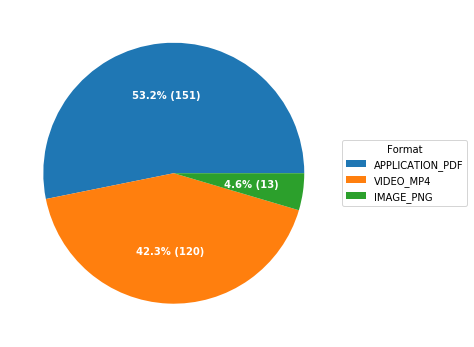

In [11]:
# format
formatCol = lom_df2[['format']]


labels=['APPLICATION_PDF', 'VIDEO_MP4', 'IMAGE_PNG']
values = formatCol['format'].value_counts()

pieChart(values, labels, legendTitle = "Format", title="")

### Interactvity Type

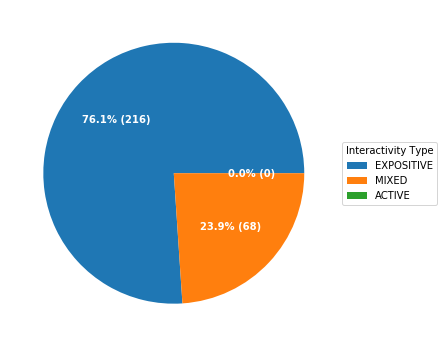

In [12]:
# interactivityType

interactivityTypeCol = lom_df2[['interactivityType']]

labels = ['EXPOSITIVE', 'MIXED', 'ACTIVE']
values = interactivityTypeCol['interactivityType'].value_counts().append(pd.Series({'InteractivityType.ACTIVE': 0}))

pieChart(values, labels, legendTitle = "Interactivity Type", title="")

### Interactivity Level

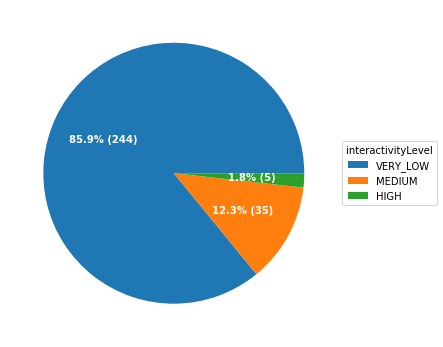

In [13]:
interactivityLevelCol = lom_df2[['interactivityLevel']]

labels = ['VERY_LOW', 'MEDIUM', 'HIGH']
values = interactivityLevelCol['interactivityLevel'].value_counts()

pieChart(values, labels, legendTitle = "interactivityLevel", title="")

### Difficulty

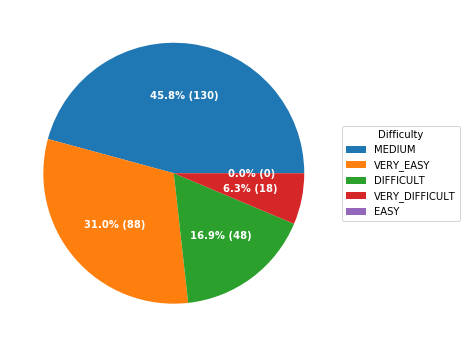

In [14]:
difficultyCol = lom_df2[['difficulty']]

labels = ['MEDIUM', 'VERY_EASY', 'DIFFICULT', 'VERY_DIFFICULT', 'EASY']
values = difficultyCol['difficulty'].value_counts().append(pd.Series({'Difficulty.EASY': 0}))
#values
pieChart(values, labels, legendTitle = "Difficulty", title="")

###  Learning Resource Type

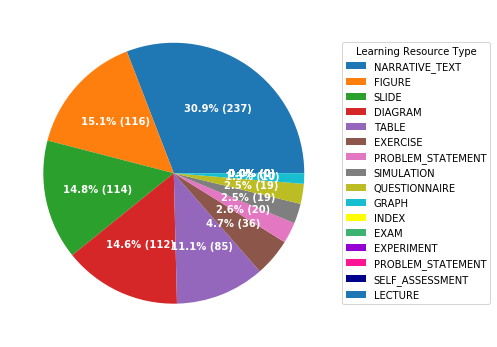

In [253]:
learningResourceTypeCol = lom_df2[['learningResourceType'+str(i) for i in range(8)]]
learningResourceTypeCol.apply(pd.value_counts).fillna(0)
learningResourceTypeCol.stack().value_counts()

labels= ['NARRATIVE_TEXT', 'FIGURE', 'SLIDE', 'DIAGRAM', 'TABLE', 'EXERCISE', 'PROBLEM_STATEMENT', 'SIMULATION', 'QUESTIONNAIRE', 'GRAPH', 'INDEX', 'EXAM', 'EXPERIMENT', 'PROBLEM_STATEMENT', 'SELF_ASSESSMENT', 'LECTURE']
values = learningResourceTypeCol.stack().value_counts().append(pd.Series({'INDEX': 0, 'EXAM': 0, 'EXPERIMENT': 0, 'PROBLEM_STATEMENT': 0, 'SELF_ASSESSMENT': 0, 'LECTURE': 0}))
#values

colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF', '#FFFF00', '#3CB371', '#9400D3', '#FF1493', '#00008B']

pieChart(values, labels, legendTitle = "Learning Resource Type", title="", colors=colors)

### Typical Learning Time

In [16]:
typicalLearningTimeCol = lom_df2[['typicalLearningTime']].applymap(lambda time_str: datetime.datetime.strptime(time_str, '%H:%M:%S').time())

maxTime = datetime.time(0,0,0)
minTime = typicalLearningTimeCol.iloc[0,0]


for time in typicalLearningTimeCol.typicalLearningTime:
    if(time > maxTime):
        maxTime = time
    if(time < minTime):
        minTime = time

print(maxTime)
print(minTime)

13:02:57
00:01:30


In [18]:
listTime = sorted(typicalLearningTimeCol.typicalLearningTime.to_list())

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [(datetime.datetime.min + dt).time() for dt in datetime_range(datetime.timedelta(minutes=5), datetime.timedelta(hours=3, minutes=5), datetime.timedelta(minutes=5))]

timeL = [minTime] + dts + [datetime.time(3, 15), datetime.time(5, 25), datetime.time(6, 15), datetime.time(13, 5) ]

timeDict = {}
for i, time in enumerate(timeL[:-1]):
    timeDict.update({str(timeL[i]) + " - " + str(timeL[i+1]): 0})

    
for duration in listTime:
    for i, time in enumerate(timeL[:-1]):
        if(duration >= timeL[i] and duration <  timeL[i+1]):
            timeDict[str(timeL[i]) + " - " + str(timeL[i+1])] += 1


print(timeDict)
print(sum(timeDict.values()))

{'00:01:30 - 00:05:00': 30, '00:05:00 - 00:10:00': 59, '00:10:00 - 00:15:00': 35, '00:15:00 - 00:20:00': 30, '00:20:00 - 00:25:00': 22, '00:25:00 - 00:30:00': 19, '00:30:00 - 00:35:00': 18, '00:35:00 - 00:40:00': 13, '00:40:00 - 00:45:00': 11, '00:45:00 - 00:50:00': 5, '00:50:00 - 00:55:00': 6, '00:55:00 - 01:00:00': 5, '01:00:00 - 01:05:00': 7, '01:05:00 - 01:10:00': 2, '01:10:00 - 01:15:00': 2, '01:15:00 - 01:20:00': 4, '01:20:00 - 01:25:00': 1, '01:25:00 - 01:30:00': 2, '01:30:00 - 01:35:00': 0, '01:35:00 - 01:40:00': 0, '01:40:00 - 01:45:00': 1, '01:45:00 - 01:50:00': 0, '01:50:00 - 01:55:00': 0, '01:55:00 - 02:00:00': 1, '02:00:00 - 02:05:00': 0, '02:05:00 - 02:10:00': 1, '02:10:00 - 02:15:00': 0, '02:15:00 - 02:20:00': 0, '02:20:00 - 02:25:00': 0, '02:25:00 - 02:30:00': 0, '02:30:00 - 02:35:00': 1, '02:35:00 - 02:40:00': 1, '02:40:00 - 02:45:00': 0, '02:45:00 - 02:50:00': 0, '02:50:00 - 02:55:00': 3, '02:55:00 - 03:00:00': 1, '03:00:00 - 03:15:00': 1, '03:15:00 - 05:25:00': 1, '0

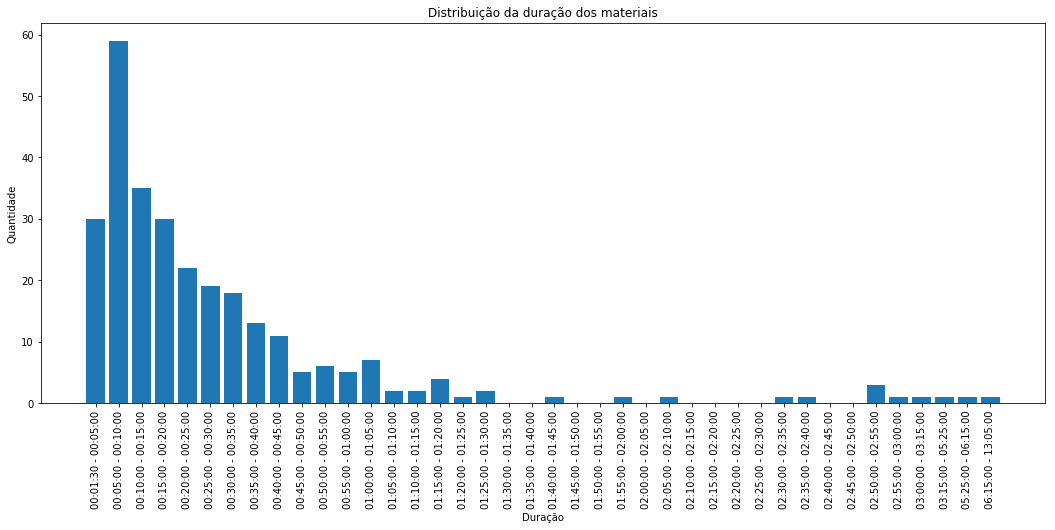

In [19]:
f, ax = plt.subplots(figsize=(18,7))
plt.bar(list(timeDict.keys()), timeDict.values())
plt.xticks(rotation=90)
ax.set_title("Distribuição da duração dos materiais")
plt.xlabel("Duração")
plt.ylabel("Quantidade")
plt.show()

### Quais são os perfis de alunos que a base atende melhor?  

O objetivo aqui é calcular para cada material qual o estilo de aprendizagem ele corresponde dada cada uma das quatro dimensões definidas por FSLSM. Para isso, será utilizada a seguinte tabela definida por MÉNDEZ et al., 2016 e modificado por MACHADO, 2018:

<sup><sup>MÉNDEZ, Nestor D. Duque; MORALES, Valentina Tabares; VICARI, Rosa M. Learning object metadata mapping with learning styles as a strategy for improving usability of educational resource repositories. IEEE Revista Iberoamericana de Tecnologias del Aprendizaje, v. 11, n. 2, p. 101-106, 2016.</sup></sup> <br>
<sup><sup>M. de O. C. Machado, “Geração de Sequências Curriculares Adaptativas baseada no Perfil dos Alunos e Materiais Didáticos utilizando o Algoritmo Presa-Predador” Universidade Federal de Juiz de Fora, 2018.</sup></sup>

In [214]:
learningStyles = ['active', 'reflective', 'sensory', 'intuitive', 'visual', 'verbal', 'sequential', 'global']

labels= ['NARRATIVE_TEXT', 'FIGURE', 'SLIDE', 'DIAGRAM', 'TABLE', 'EXERCISE', 'PROBLEM_STATEMENT', 'SIMULATION', 'QUESTIONNAIRE', 'GRAPH', 'INDEX', 'EXAM', 'EXPERIMENT', 'PROBLEM_STATEMENT', 'SELF_ASSESSMENT', 'LECTURE']

learningResourceTypeIndex = [LearningResourceType.EXERCISE, LearningResourceType.SIMULATION, LearningResourceType.QUESTIONNAIRE, LearningResourceType.DIAGRAM, LearningResourceType.FIGURE, LearningResourceType.GRAPH, LearningResourceType.SLIDE, LearningResourceType.TABLE, LearningResourceType.NARRATIVE_TEXT, LearningResourceType.EXAM, LearningResourceType.EXPERIMENT, LearningResourceType.PROBLEM_STATEMENT, LearningResourceType.SELF_ASSESSMENT, LearningResourceType.LECTURE, InteractivityLevel.VERY_LOW, InteractivityLevel.LOW, InteractivityLevel.MEDIUM, InteractivityLevel.HIGH, InteractivityLevel.VERY_HIGH, InteractivityType.ACTIVE, InteractivityType.EXPOSITIVE, InteractivityType.MIXED]

tab0 = pd.DataFrame(np.array([[1,0,1,0,0,0,1,0], [1,1,1,1,1,0,1,0], [1,0,0,1,0,0,0,0], [0,1,0,1,1,0,1,1], [0,1,0,1,1,0,0,1], [0,1,1,0,1,0,0,1], [0,1,1,1,1,1,1,1], [0,1,1,0,1,0,0,1], [0,1,1,1,0,1,1,1], [1,1,1,1,0,0,0,0], [1,0,1,0,0,0,1,0], [0,1,1,0,0,0,0,0], [1,1,1,1,1,1,1,1], [0,1,1,1,0,1,1,1], [0,0,0,0,0,0,0,0], [1,0,0,0,0,0,0,0], [2,0,0,0,0,0,0,0], [3,0,0,0,0,0,0,0], [4,0,0,0,0,0,0,0], [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [1,1,0,0,0,0,0,0]]), columns=learningStyles)
tab0.index = learningResourceTypeIndex
tab0

,active,reflective,sensory,intuitive,visual,verbal,sequential,global
LearningResourceType.EXERCISE,1,0,1,0,0,0,1,0
LearningResourceType.SIMULATION,1,1,1,1,1,0,1,0
LearningResourceType.QUESTIONNAIRE,1,0,0,1,0,0,0,0
LearningResourceType.DIAGRAM,0,1,0,1,1,0,1,1
LearningResourceType.FIGURE,0,1,0,1,1,0,0,1
LearningResourceType.GRAPH,0,1,1,0,1,0,0,1
LearningResourceType.SLIDE,0,1,1,1,1,1,1,1
LearningResourceType.TABLE,0,1,1,0,1,0,0,1
LearningResourceType.NARRATIVE_TEXT,0,1,1,1,0,1,1,1
LearningResourceType.EXAM,1,1,1,1,0,0,0,0


Aqui cada material terá uma lista de tamanho oito com o somatório dos seus EA.

In [386]:
tab1 = lom_df2[['identifier','interactivityType', 'interactivityLevel']+ ['learningResourceType'+str(i) for i in range(8)]]
tab1 = tab1.set_index('identifier')

materialStylesPointsList = list()

for index, row in tab1.iterrows(): 
    styles = np.array([0,0,0,0,0,0,0,0])
    for elem in row:
        if not(pd.isna(elem)):
            styles += np.array(tab0.loc[[eval(elem)]].values.tolist()[0]) # ex.:  LearningResourceType.LECTURE -> [0,1,1,1,0,1,1,1] + styles
    
    materialStylesPointsList.append({index: styles.tolist()})
    


Agora será calculado a tendência de cada material para cada uma das opções das dimensões de FSLSM. Esses valores podem ser positivos, negativos ou zero, indicando que não há uma tendência para nenhuma das duas opções.

In [322]:
materialStyles = list()

for material in materialStylesPointsList:
    styles = list()
    for i, style in enumerate(list(material.values())[0][:-4]):
        i *= 2 
        value = list(material.values())[0][i] - list(material.values())[0][i+1]
        if(value > 0):
            styles.append(learningStyles[i])
        elif(value < 0):
            styles.append(learningStyles[i+1])
        else:
            styles.append("neutral_"+str(i))
    materialStyles.append({list(material.keys())[0]: styles})
    
    
sty = [list(dici.values())[0] for dici in materialStyles]
stylesDict = dict(Counter(x for xs in sty for x in set(xs)))

processing = {'active': stylesDict['active'], 'reflective': stylesDict['reflective'], 'neutral': stylesDict['neutral_0']}
print(processing)
perception = {'sensory': stylesDict['sensory'], 'intuitive': stylesDict['intuitive'], 'neutral': stylesDict['neutral_2']}
print(perception)
representation = {'visual': stylesDict['visual'], 'verbal': stylesDict['verbal'], 'neutral': stylesDict['neutral_4']}
print(representation)
understanding = {'sequential': stylesDict['sequential'], 'global': stylesDict['global'], 'neutral': stylesDict['neutral_6']}
print(understanding)


{'active': 18, 'reflective': 251, 'neutral': 15}
{'sensory': 59, 'intuitive': 132, 'neutral': 93}
{'visual': 114, 'verbal': 49, 'neutral': 121}
{'sequential': 18, 'global': 142, 'neutral': 124}


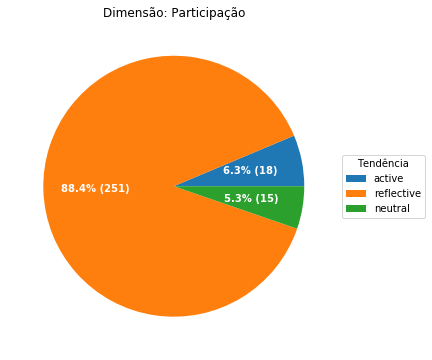

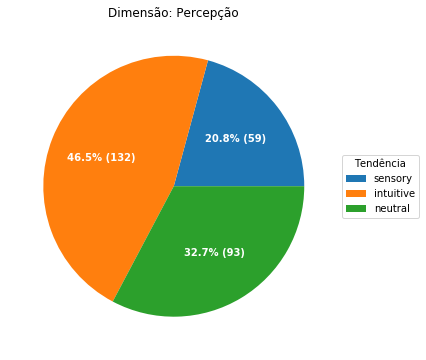

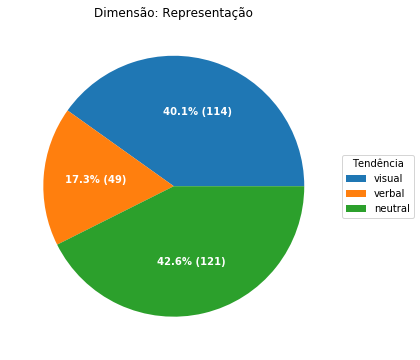

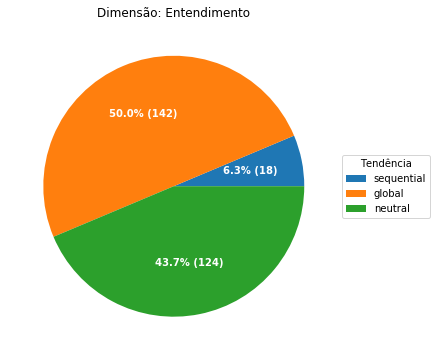

In [377]:
#
pieChart([val for val in processing.values()], ['active', 'reflective','neutral'], legendTitle = "Tendência", title="Dimensão: Participação")
pieChart([val for val in perception.values()], ['sensory', 'intuitive','neutral'], legendTitle = "Tendência", title="Dimensão: Percepção")
pieChart([val for val in representation.values()], ['visual', 'verbal','neutral'], legendTitle = "Tendência", title="Dimensão: Representação")
pieChart([val for val in understanding.values()], ['sequential', 'global','neutral'], legendTitle = "Tendência", title="Dimensão: Entendimento")

O tipo de aluno que a base melhor atende é aquele que apresenta o EA igual a: reflexivo, intuitivo, neutro (ou visual), global.

### Cobertura de Conceitos  

Quantos conceitos cada material cobre?

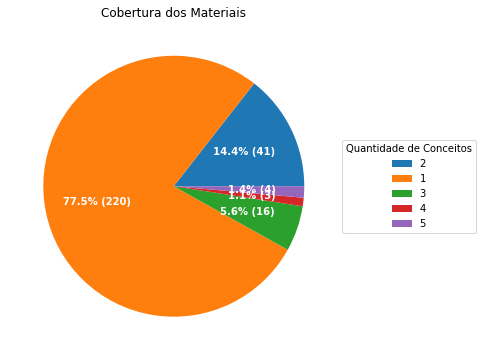

In [566]:
cobertura = pd.read_csv('../evolutionary-computation/instances/real/material_coverage.csv', sep=';', names=['id', 'conceito_1', 'conceito_2', 'conceito_3', 'conceito_4', 'conceito_5'])
cobertura = cobertura.set_index('id')

values = list(Counter(cobertura.count(axis='columns')).values())
pieChart(values,['2', '1', '3', '4', '5'], legendTitle = "Quantidade de Conceitos", title="Cobertura dos Materiais" )

Quais são os conceitos que os materiais cobrem? Distribuição dos conceitos.

In [433]:
quantConceitos = cobertura.stack().value_counts().to_dict()
quantConceitos

{'ICL03': 19,
 'ICSN01': 18,
 'ICFSOOC01': 17,
 'ICFA01': 17,
 'ICFA02': 16,
 'ICRC03': 16,
 'ICRC02': 16,
 'ICL02': 15,
 'ICSN03': 14,
 'ICFBD01': 14,
 'ICES03': 13,
 'ICFSOOC02': 13,
 'ICRC01': 13,
 'ICRC04': 13,
 'ICFBD02': 12,
 'ICES02': 12,
 'ICFA03': 12,
 'ICRC05': 12,
 'ICFSOOC03': 12,
 'ICHCC01': 12,
 'ICHCC03': 11,
 'ICFBD03': 11,
 'ICHCC04': 11,
 'ICHCC02': 11,
 'ICES01': 11,
 'ICHCC05': 11,
 'ICSN02': 11,
 'ICSN04': 9,
 'ICHCC06': 9}

A lista de conceitos não apresenta o conceito 'ICL01' (O que é Lógica) e este conceito também não foi indicado para nenhum aluno.

## Materiais entregues 

Carregar da sequência curricular definida para cada aluno e transformar para array. <br>
Depois fazer um dicio onde o material é a key e o value é uma tupla (quantidadeFalse, quantidadeTrue). <br>


In [570]:

header = ['material_' + str(i) for i in range(0,284)]

data = pd.read_csv('../evolutionary-computation/studentXselectedMaterials-19-03-2020.csv', names=header)

df = pd.DataFrame(data)

dataset = df.apply(pd.Series.value_counts).to_dict() # conta a quantidade de False e True de cada material(coluna)

materialDict = dict() 

for material, materialCount in dataset.items(): # dataset -> {'material_1': {False: 18, True: 6}, ... }
    for key, value in materialCount.items():
        if(np.isnan(value)):
            materialCount[key] = int(0)
        elif(isinstance(value, float)):
            materialCount[key] = int(value)
            
        materialDict[material] = list(materialCount.values())


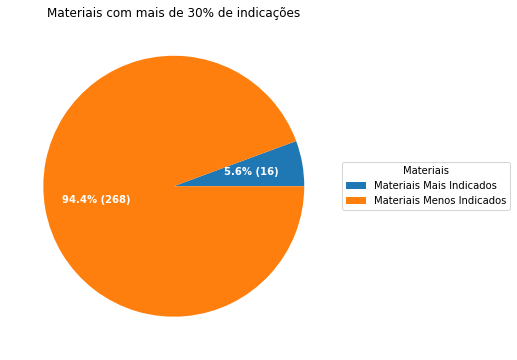

In [571]:
# se um material x foi indicado menos que 30% (17 de 24) das vezes, ou seja, se o número de falso for maior que 17, então:

materiaisMaisEscolhidos = set()
materiaisMenosEscolhidos = set()

for key, value in materialDict.items(): # materialDict -> {'material_1': (18, 6), ...}
    if(value[0] >= 17): #value[0] = False
        materiaisMenosEscolhidos.add(key)
    else:
        materiaisMaisEscolhidos.add(key)
    

labels = ['Materiais Mais Indicados', 'Materiais Menos Indicados']
values = [len(materiaisMaisEscolhidos), len(materiaisMenosEscolhidos)]

pieChart(values, labels, legendTitle = "Materiais", title="Materiais com mais de 30% de indicações")

<b>% de indicações X % de materiais</b>

Counter({0.0: 35.2112676056338, 5.0: 20.070422535211268, 9.0: 13.028169014084506, 13.0: 11.267605633802818, 17.0: 4.929577464788732, 21.0: 3.873239436619718, 30.0: 3.169014084507042, 25.0: 2.8169014084507045, 38.0: 2.8169014084507045, 34.0: 1.4084507042253522, 50.0: 0.7042253521126761, 42.0: 0.35211267605633806, 55.00000000000001: 0.35211267605633806})


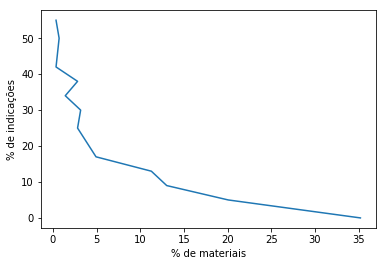

In [572]:
for key, value in materialDict.items():
    materialDict[key] += [round_up(value[1]/(value[0]+ value[1]), 2) ] # porcentagem de indicação

values = Counter([val[2] * 100for val in materialDict.values()]) # porcentagem de indicação: quantidade de materiais

for key, val in values.items(): 
    values[key] = (val/284) * 100
    
print(values) # porcentagem de indicação: porcentagem de materiais

values = OrderedDict(sorted(values.items()))

plt.plot(values.values(),values.keys())
plt.xlabel("% de materiais")
plt.ylabel("% de indicações")
plt.show()

In [573]:
valoresFalsos = pd.Series(value[0] for value in materialDict.values())
valoresVerdadeiros = pd.Series(value[1] for value in materialDict.values())

print("Valores Verdadeiros:\n\n")
print(valoresVerdadeiros.describe())
print("\nMediana de Valores Verdadeiros: " + str(valoresVerdadeiros.median()))

print("Valores Falsos:\n\n")
print(valoresFalsos.describe())
print("\nMediana de Valores Falsos: " + str(valoresFalsos.median()))

Valores Verdadeiros:


count    284.000000
mean       2.112676
std        2.600893
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       13.000000
dtype: float64

Mediana de Valores Verdadeiros: 1.0
Valores Falsos:


count    284.000000
mean      21.887324
std        2.600893
min       11.000000
25%       21.000000
50%       23.000000
75%       24.000000
max       24.000000
dtype: float64

Mediana de Valores Falsos: 23.0


<b>Estilo de aprendizagem: </b>

In [598]:
dictMaterialsLS = dict()

for dici in materialStyles:
    dictMaterialsLS.update(dici)

materials16 = list()
for material in materiaisMaisEscolhidos:
    mat = [int(material.strip('material_'))]
    mat.append(lom_df2.loc[lom_df2['identifier'] == mat[0]].difficulty.values[0])
    mat.append(lom_df2.loc[lom_df2['identifier'] == mat[0]].typicalLearningTime.values[0])
    mat.append(dictMaterialsLS[mat[0]])
    materials16.append(mat)
    
best16 = pd.DataFrame(materials16, columns=['identifier', 'Difficulty', 'typicalLearningTime', 'LS'])
best16

,identifier,Difficulty,typicalLearningTime,LS
0,1,Difficulty.MEDIUM,00:38:09,"[reflective, neutral_2, visual, global]"
1,212,Difficulty.MEDIUM,00:21:50,"[reflective, sensory, neutral_4, neutral_6]"
2,141,Difficulty.MEDIUM,00:06:41,"[reflective, neutral_2, visual, global]"
3,147,Difficulty.MEDIUM,00:14:41,"[reflective, neutral_2, visual, sequential]"
4,155,Difficulty.MEDIUM,00:27:35,"[reflective, neutral_2, neutral_4, neutral_6]"
5,5,Difficulty.MEDIUM,00:11:37,"[reflective, intuitive, neutral_4, global]"
6,173,Difficulty.MEDIUM,00:15:07,"[reflective, neutral_2, verbal, neutral_6]"
7,27,Difficulty.DIFFICULT,00:05:24,"[reflective, intuitive, neutral_4, global]"
8,53,Difficulty.DIFFICULT,00:11:58,"[reflective, intuitive, neutral_4, global]"
9,18,Difficulty.MEDIUM,00:02:00,"[reflective, intuitive, neutral_4, neutral_6]"


In [575]:
best16LS = sum((Counter(x) for x in list(map(Counter, best16.LS))),Counter())

print(best16LS)


Counter({'reflective': 16, 'global': 10, 'intuitive': 9, 'neutral_4': 8, 'visual': 7, 'neutral_2': 6, 'neutral_6': 5, 'sensory': 1, 'sequential': 1, 'verbal': 1})


{'reflective': 16}
{'neutral_2': 6, 'sensory': 1, 'intuitive': 9}
{'visual': 7, 'neutral_4': 8, 'verbal': 1}
{'global': 10, 'neutral_6': 5, 'sequential': 1}


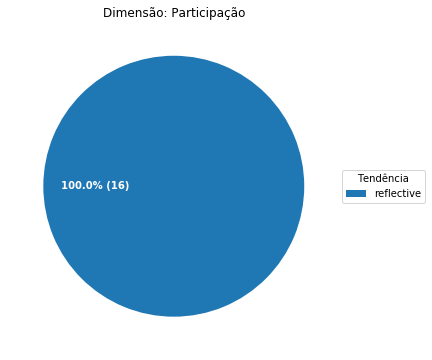

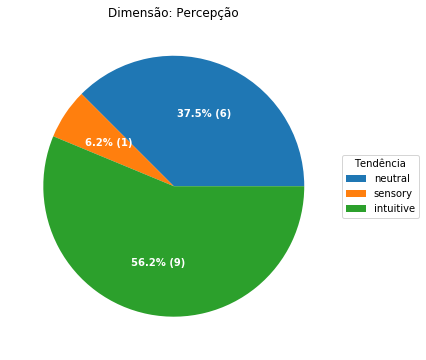

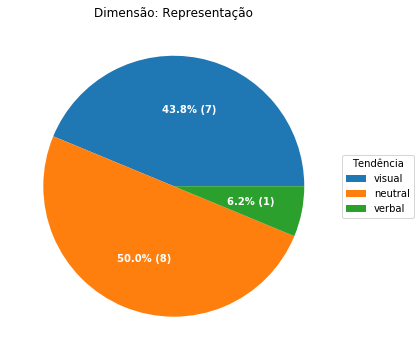

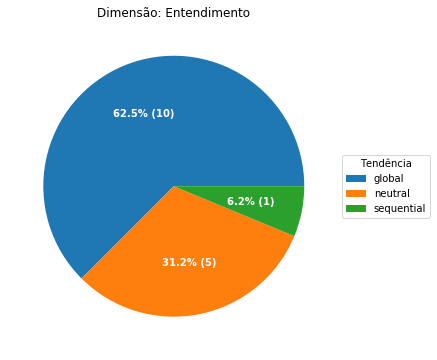

In [580]:
processing16 = { key:value for (key,value) in best16LS.items() if key in ['reflective', 'active','neutral_0'] }
print(processing16)
perception16 = {key:value for (key,value) in best16LS.items() if key in ['intuitive','sensory','neutral_2']}
print(perception16)
representation16 = {key:value for (key,value) in best16LS.items() if key in ['neutral_4','visual', 'verbal']}
print(representation16)
understanding16 = {key:value for (key,value) in best16LS.items() if key in ['global','neutral_6', 'sequential']}
print(understanding16)

pieChart([val for val in processing16.values()] , ['reflective', 'active','neutral'], legendTitle = "Tendência", title="Dimensão: Participação")
pieChart([val for val in perception16.values()], ['neutral','sensory', 'intuitive'], legendTitle = "Tendência", title="Dimensão: Percepção")
pieChart([val for val in representation16.values()], ['visual', 'neutral', 'verbal'], legendTitle = "Tendência", title="Dimensão: Representação")
pieChart([val for val in understanding16.values()], ['global','neutral', 'sequential'], legendTitle = "Tendência", title="Dimensão: Entendimento")


O EA que os materiais mais indicados melhor atendem é: reflexivo, intuitivo, neutro (ou visual), global. O que corresponde com o EA que a base melhor atende.

<b>Cobertura de Conceitos:</b> Quantos conceitos os 16 melhores materiais cobrem?

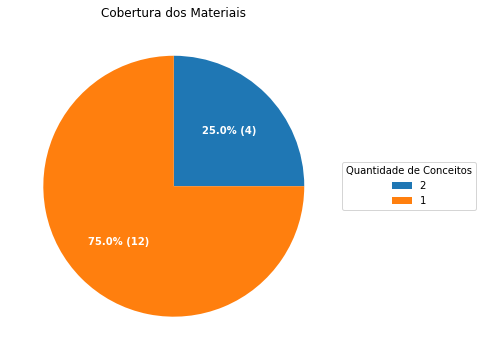

In [588]:
coberturaCount = cobertura.count(axis='columns')
cobertura16 = list()
for material in materiaisMaisEscolhidos:
    mat = [int(material.strip('material_'))]
    mat.append(coberturaCount.loc[mat[0]])
    cobertura16.append(mat[1])
    
pieChart(list(Counter(cobertura16).values()),['2', '1'], legendTitle = "Quantidade de Conceitos", title="Cobertura dos Materiais" )

Quais são os conceitos que os materiais mais indicados cobrem? Distribuição dos conceitos.

In [589]:

quantConceitos16 = list()
for material in materiaisMaisEscolhidos:
    mat = [int(material.strip('material_'))]
    quantConceitos16.append(cobertura.loc[mat[0]-1].value_counts().to_dict())

quantConceitos16 = sum((Counter(x) for x in quantConceitos16),Counter()) 
quantConceitos16

Counter({'ICFA02': 4,
         'ICFA01': 2,
         'ICL03': 1,
         'ICES01': 2,
         'ICES02': 3,
         'ICES03': 2,
         'ICRC02': 1,
         'ICRC03': 2,
         'ICHCC02': 1,
         'ICFSOOC02': 1,
         'ICSN01': 1,
         'ICFBD02': 1})

## Algoritmos de Categorização 

In [619]:
dataFrame = pd.DataFrame.from_dict(dictMaterialsLS, orient='index', columns=['Processing', 'Perception', 'Representation', 'Understanding'])
dataFrame = pd.get_dummies(dataFrame)
dataFrame = dataFrame[['Processing_active', 'Processing_neutral_0', 'Processing_reflective', 'Perception_sensory', 'Perception_neutral_2','Perception_intuitive', 'Representation_visual' , 'Representation_neutral_4', 'Representation_verbal', 'Understanding_sequential', 'Understanding_neutral_6', 'Understanding_global']]
dataFrame.head()

,Processing_active,Processing_neutral_0,Processing_reflective,Perception_sensory,Perception_neutral_2,Perception_intuitive,Representation_visual,Representation_neutral_4,Representation_verbal,Understanding_sequential,Understanding_neutral_6,Understanding_global
255,0,0,1,0,0,1,1,0,0,0,0,1
269,0,0,1,0,0,1,1,0,0,0,0,1
279,0,0,1,0,0,1,1,0,0,0,0,1
262,0,0,1,0,0,1,1,0,0,0,0,1
278,0,0,1,0,0,1,1,0,0,0,0,1


In [625]:

lomDf = pd.read_csv("../LOM_to_csv1.csv", sep=',')
lomDf = lomDf.drop(columns=['title', 'size'] + ['keyword'+str(i) for i in range(39)])
lomDf = lomDf.set_index('identifier')
lomDf.insert(loc=0, column='recommendation', value=pd.Series([0 for i in range(285)]))

for material, value in materialDict.items():
    id1 = int(material.strip('material_'))
    if(value[1] != 0):
        val = 1
    else:
        val = 0
    lomDf.at[id1,'recommendation']= val
    
cols=[i for i in lomDf.columns if i not in ["typicalLearningTime"]]

for col in cols:
    lomDf[col]= lomDf[col].astype('Int32')

lomDf = lomDf.join(dataFrame)     
lomDf.head()     

,recommendation,Format.APPLICATION_PDF,Format.IMAGE_PNG,Format.VIDEO_MP4,InteractivityType.ACTIVE,InteractivityType.EXPOSITIVE,InteractivityType.MIXED,LearningResourceType.EXERCISE,LearningResourceType.SIMULATION,LearningResourceType.QUESTIONNAIRE,...,Processing_reflective,Perception_sensory,Perception_neutral_2,Perception_intuitive,Representation_visual,Representation_neutral_4,Representation_verbal,Understanding_sequential,Understanding_neutral_6,Understanding_global
identifier,,,,,,,,,,,,,,,,,,,,,
255,1,1,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,1
269,1,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
279,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
262,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
278,1,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


### Árvore de decisão 

In [634]:
#split dataset in features and target variable
feature_cols = [i for i in lomDf.columns if i not in ["recommendation", "typicalLearningTime"]]

X = lomDf[feature_cols] # Features (independente)
y = lomDf.recommendation # Target variable (dependente)
y=y.astype('int')

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45348837209302323


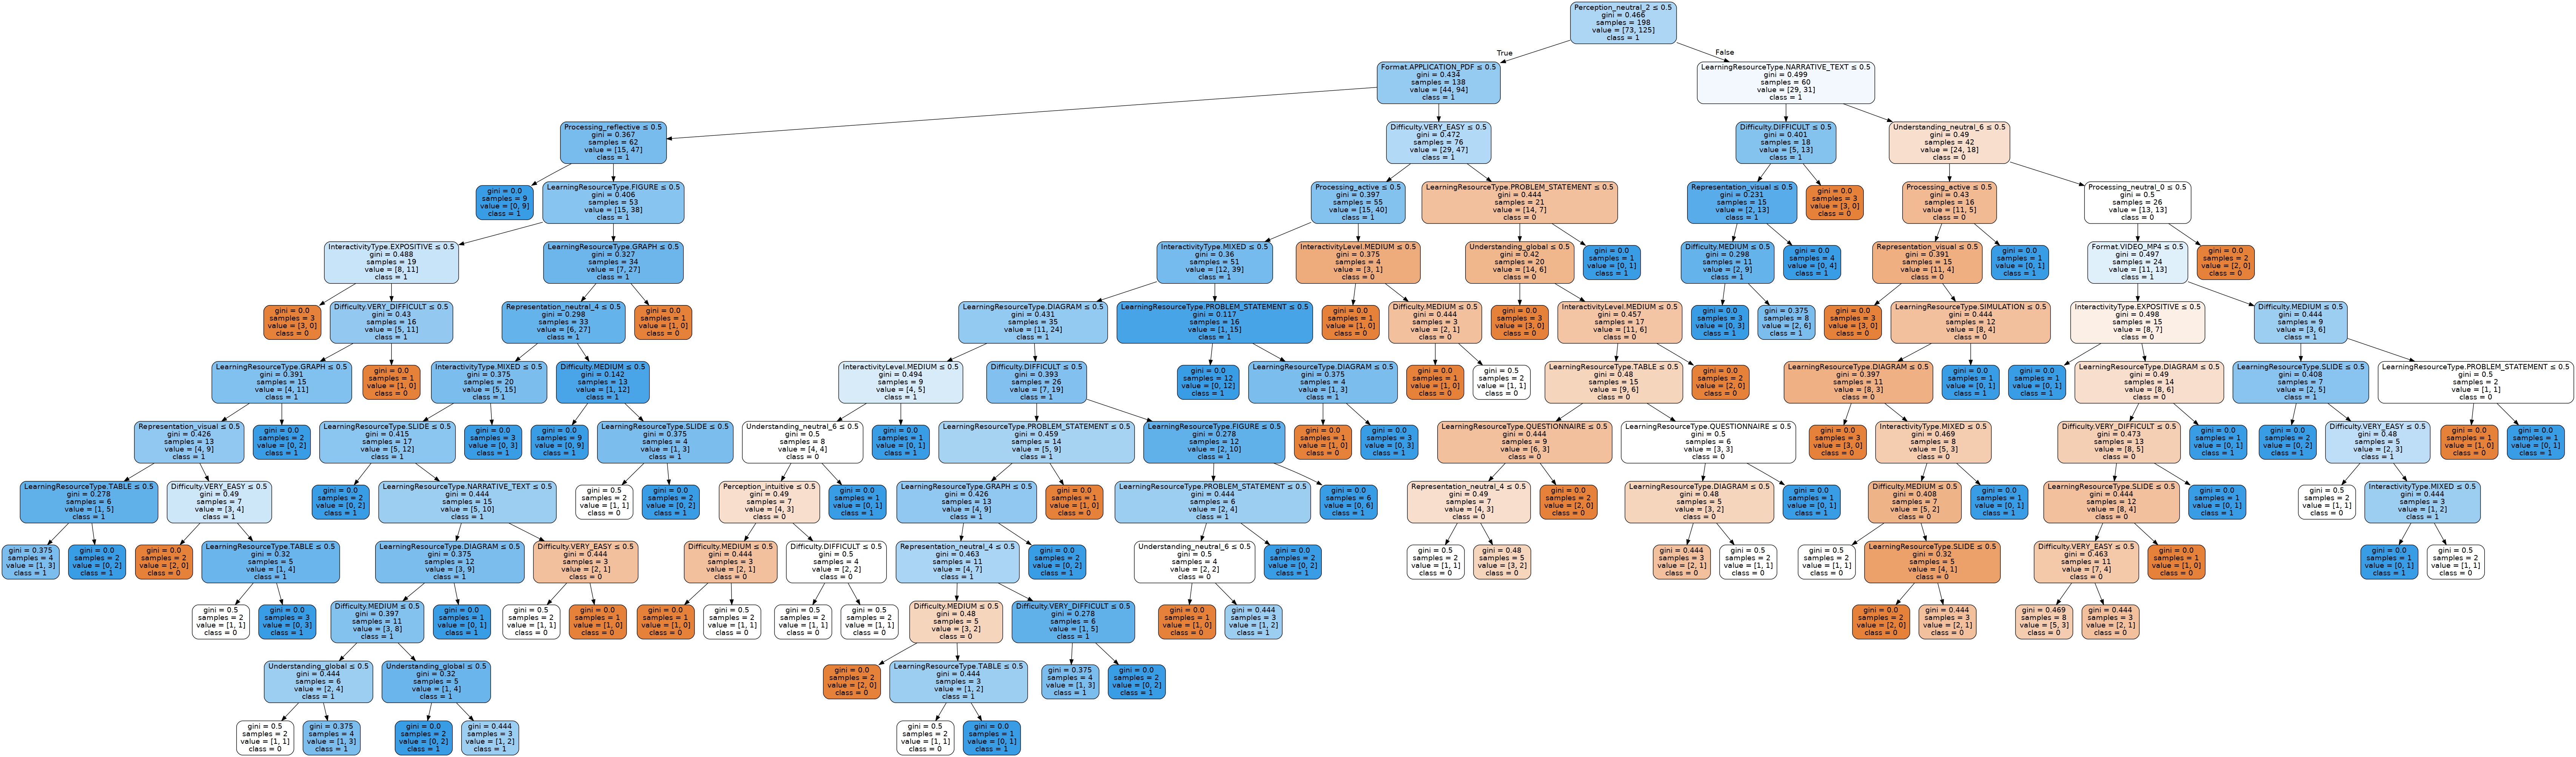

In [633]:
from IPython.display import Image 

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('baseReal.png')
Image(graph.create_png())

# Caracterização dos alunos

Utilizando os 24 perfis criados pelo André.

In [274]:
conceito = ['conceitoID_' + str(i) for i in range(1,30)]
learners = pd.read_csv("../evolutionary-computation/instances/real/learners_test.csv", sep=';', names=['id', 'timeMin', 'timeMax', 'ativo_reflexivo', 'sensorial_intuitivo', 'visual_verbal', 'sequencial_global'] + conceito)
learners

,id,timeMin,timeMax,ativo_reflexivo,sensorial_intuitivo,visual_verbal,sequencial_global,conceitoID_1,conceitoID_2,conceitoID_3,...,conceitoID_20,conceitoID_21,conceitoID_22,conceitoID_23,conceitoID_24,conceitoID_25,conceitoID_26,conceitoID_27,conceitoID_28,conceitoID_29
0,0,0,1,11,11,11,11,ICHCC01,ICHCC02,ICHCC03,...,ICES02,ICES03,ICFSOOC01,ICFSOOC02,ICFSOOC03,ICRC01,ICRC02,ICRC03,ICRC04,ICRC05
1,1,0,1,11,11,11,11,ICHCC01,ICHCC02,ICHCC03,...,ICES02,ICES03,ICFSOOC01,ICFSOOC02,ICFSOOC03,ICRC01,ICRC02,ICRC03,ICRC04,ICRC05
2,2,0,1,11,11,11,11,ICHCC01,ICHCC02,ICHCC03,...,ICRC02,ICRC03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,1,11,11,11,11,ICHCC01,ICHCC02,ICHCC03,...,ICRC02,ICRC03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,1,11,11,11,11,ICHCC01,ICHCC02,ICSN01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0,1,11,11,11,11,ICHCC01,ICHCC02,ICSN01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0,1,-11,-11,-11,-11,ICHCC01,ICHCC02,ICHCC03,...,ICES02,ICES03,ICFSOOC01,ICFSOOC02,ICFSOOC03,ICRC01,ICRC02,ICRC03,ICRC04,ICRC05
7,7,0,1,-11,-11,-11,-11,ICHCC01,ICHCC02,ICHCC03,...,ICES02,ICES03,ICFSOOC01,ICFSOOC02,ICFSOOC03,ICRC01,ICRC02,ICRC03,ICRC04,ICRC05
8,8,0,1,-11,-11,-11,-11,ICHCC01,ICHCC02,ICHCC03,...,ICRC02,ICRC03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0,1,-11,-11,-11,-11,ICHCC01,ICHCC02,ICHCC03,...,ICRC02,ICRC03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Estilo de Aprendizagem 

Dos 24 alunos, existem apenas dois perfis em relação aos EA sendo o primeiro: ativo, sensorial, visal, sequencial e o segundo: reflexivo, intuitivo, verbal, global. No qual o perfil 2 é aquele que a base de materiais melhor atende, por conta disso, os alunos desse perfil apresentam os melhores valores de função de fitness referente ao EA.